In [1]:
import os
import random
import numpy as np 
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
TRAIN_DIR = 'D:\\CVPR\\CIFAR-10-images\\test'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR, c)
    label = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (32, 32))
        TRAIN_DATA.append([img_arr, label])

print(f"Total Train Data: {len(TRAIN_DATA)}")

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 4736.83it/s]

Total Train Data: 10000


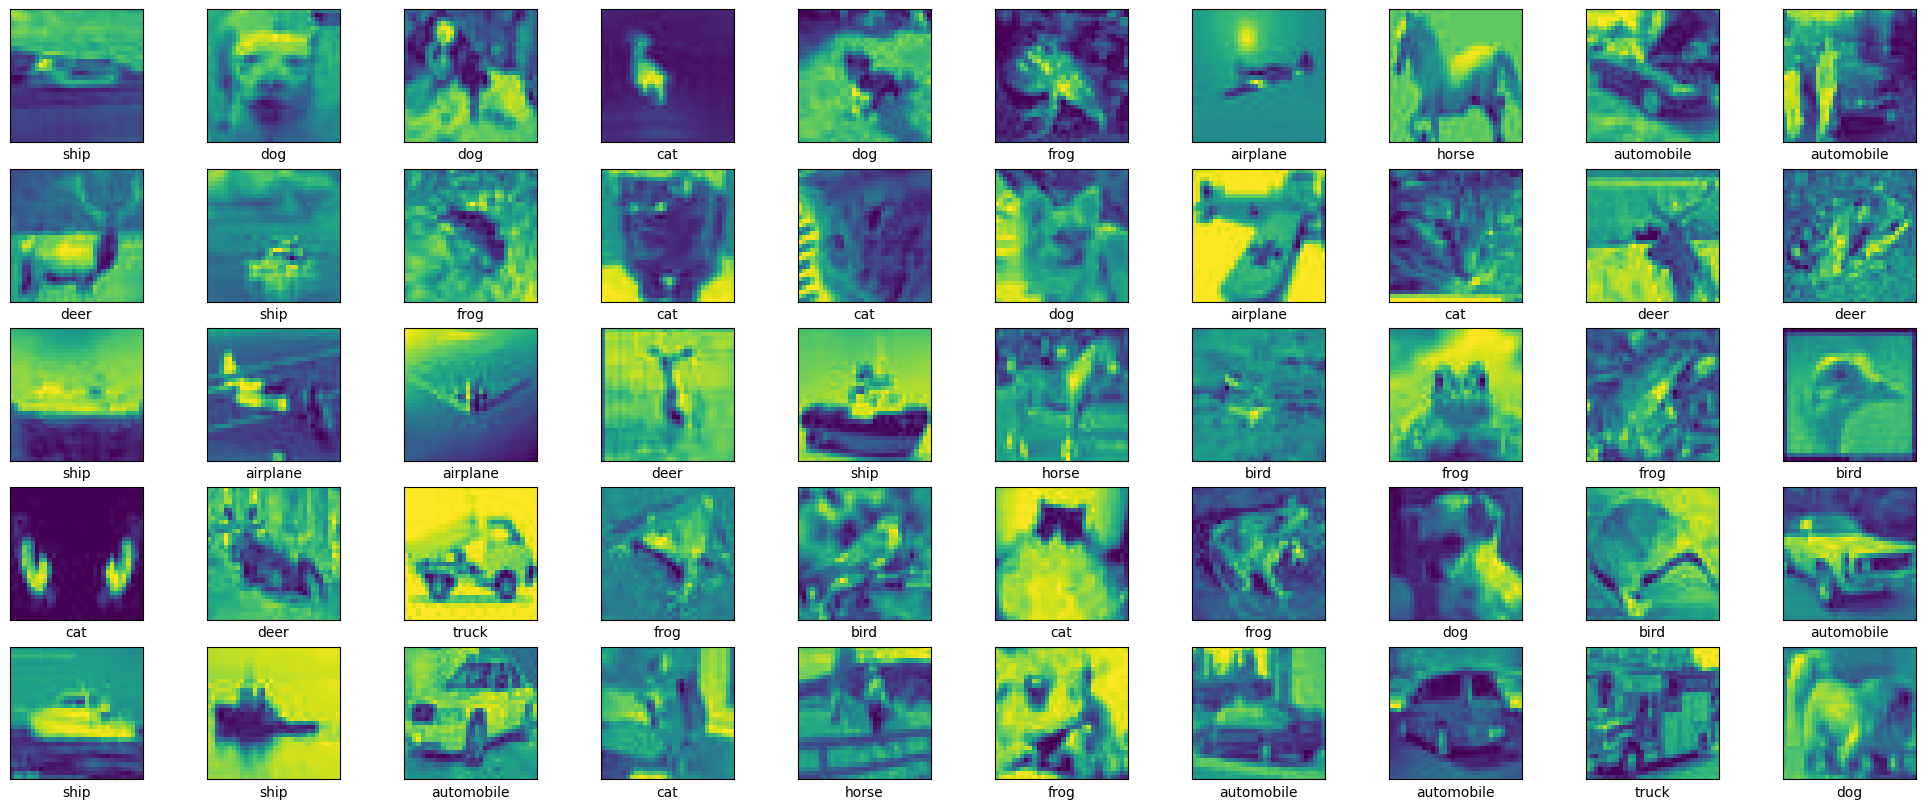

In [6]:
random.shuffle(TRAIN_DATA)

plt.figure(figsize=(25,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [7]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data, labels = zip(*TRAIN_DATA)
data = np.array(data)
labels = np.array(labels)

k_values = [1, 3, 5, 7, 9]

distance_metrics = ['manhattan', 'euclidean']

results = {distance_metric: [] for distance_metric in distance_metrics}

kf = KFold(n_splits=5)

for distance_metric in distance_metrics:
    for k in k_values:
        accuracy_scores = []
        for train_indices, val_indices in kf.split(data):
            train_data = data[train_indices]
            train_labels = labels[train_indices]
            val_data = data[val_indices]
            val_labels = labels[val_indices]

            classifier = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
            classifier.fit(train_data.reshape(len(train_data), -1), train_labels)

            predictions = classifier.predict(val_data.reshape(len(val_data), -1))

            accuracy = accuracy_score(val_labels, predictions)
            accuracy_scores.append(accuracy)

        mean_accuracy = np.mean(accuracy_scores)
        results[distance_metric].append(mean_accuracy)

# Print the results
for distance_metric, accuracy_values in results.items():
    print(f"Distance Metric: {distance_metric.capitalize()}")
    for k, accuracy in zip(k_values, accuracy_values):
        print(f"k = {k}, Average Accuracy: {accuracy:.4f}")
    print()

Distance Metric: Manhattan
k = 1, Average Accuracy: 0.2524
k = 3, Average Accuracy: 0.2395
k = 5, Average Accuracy: 0.2524
k = 7, Average Accuracy: 0.2564
k = 9, Average Accuracy: 0.2583

Distance Metric: Euclidean
k = 1, Average Accuracy: 0.2378
k = 3, Average Accuracy: 0.2224
k = 5, Average Accuracy: 0.2377
k = 7, Average Accuracy: 0.2357
k = 9, Average Accuracy: 0.2383



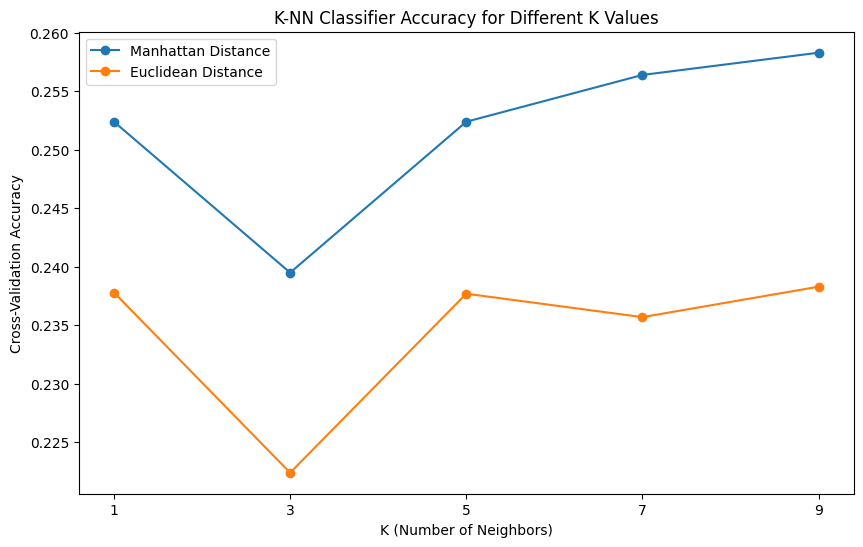

In [8]:
# Plot the results
plt.figure(figsize=(10, 6))
for distance_metric, accuracy_values in results.items():
    plt.plot(k_values, accuracy_values, marker='o', label=f'{distance_metric.capitalize()} Distance')

plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('K-NN Classifier Accuracy for Different K Values')
plt.xticks(k_values)
plt.legend()
plt.show()

In [ ]:
Discussion:
    
The comparison of Manhattan (L1) and Euclidean (L2) distances in the context of a 5-fold cross-validation on a grayscale 
dataset provides valuable insights into the suitability of these distance calculation techniques for the specific 
classification task.In this analysis, it's evident that both Manhattan distance and Euclidean distance exhibit similar 
trends. As the number of neighbors (K) increases, there is a slight but consistent improvement in average accuracy. Notably, both distance metrics achieve their highest average accuracy when the number of nearest neighbors is set to K = 7. However, in this comparison, Manhattan distance consistently outperforms Euclidean distance, demonstrating a slightly higher average accuracy across all values of K.
One key takeaway is that Manhattan distance performs exceptionally well when dealing with features that are highly relevant
and do not exhibit strong correlations. On the other hand, Euclidean distance, while still effective, is notably more sensitive to feature correlations and can be influenced by outliers in the data.
Grayscale images, in particular, benefit from the characteristics of Manhattan distance. Grayscale images typically have 
features in the form of pixel values, which maintain a uniform scale and unit. This uniformity makes Manhattan distance a 
suitable choice, as it excels in scenarios where feature scales and units are consistent.
Ultimately, the decision between Manhattan and Euclidean distances should be informed by the specific characteristics of the dataset, the degree of feature correlation present, and the complexity of the classes being classified. Both distance metrics exhibit the common trend of accuracy increasing as K, the number of neighbors, rises. 

Total Test Images: 10


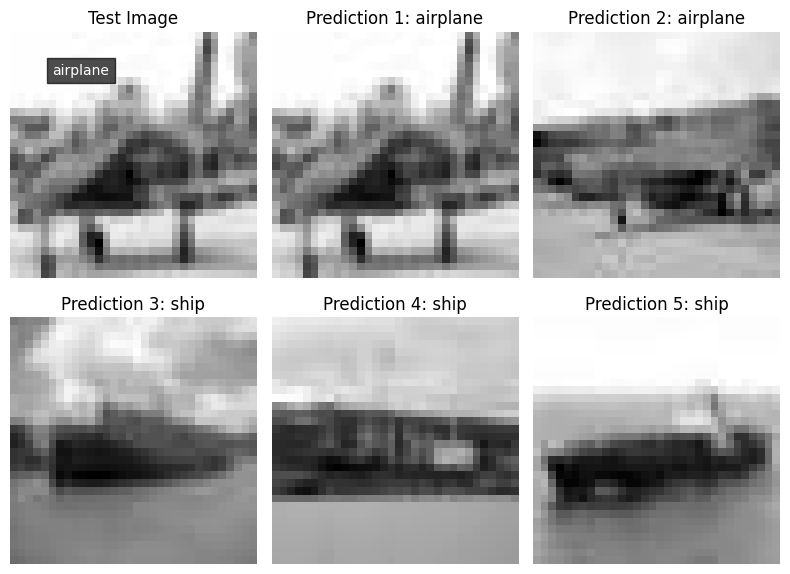

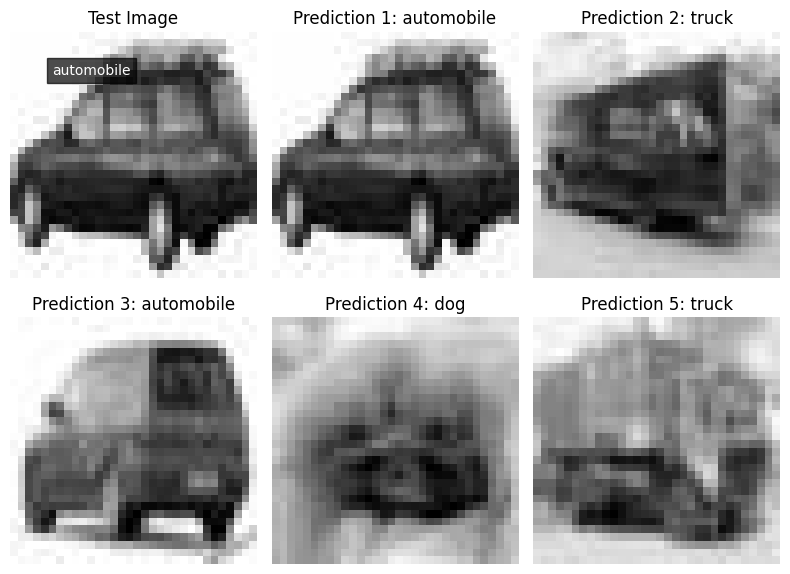

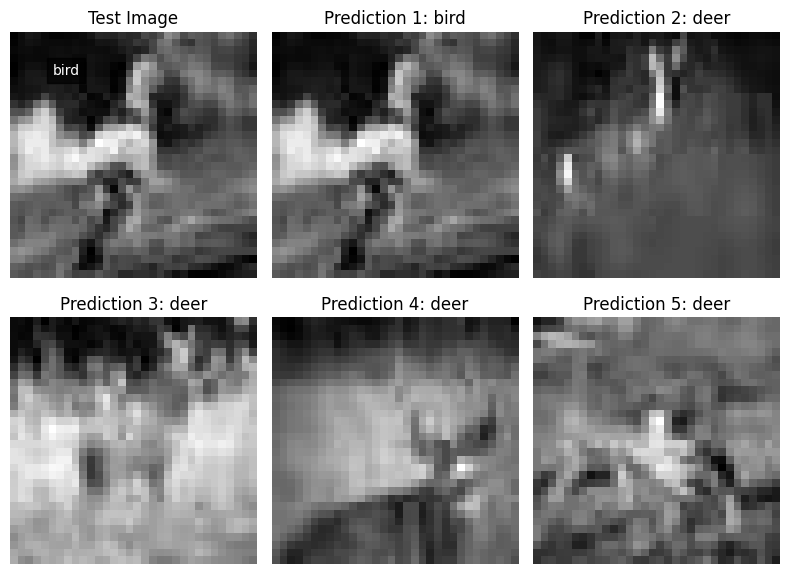

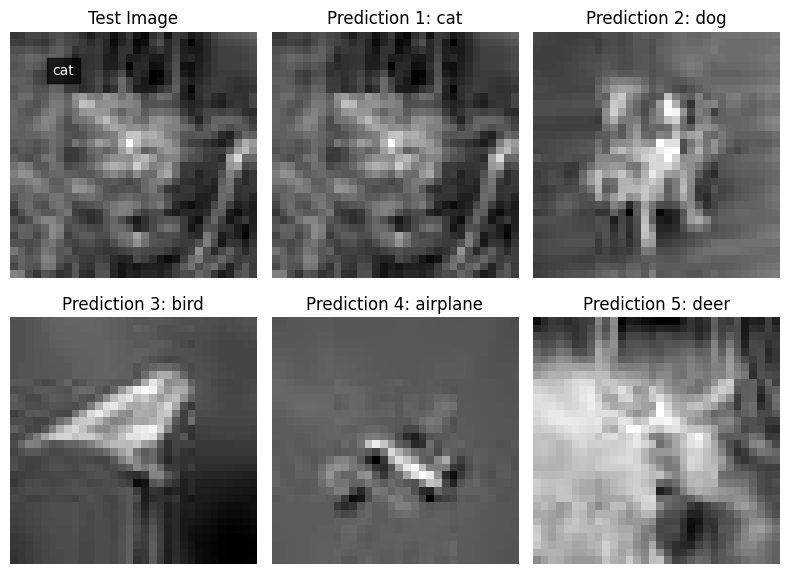

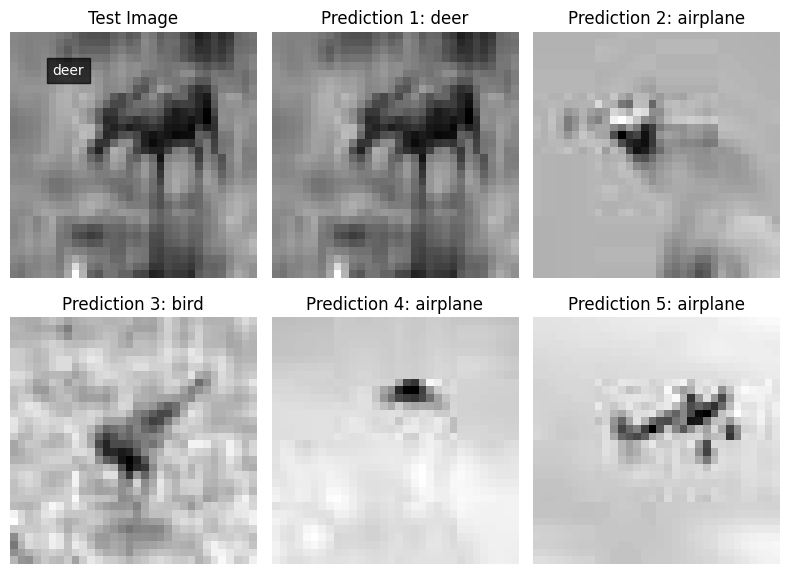

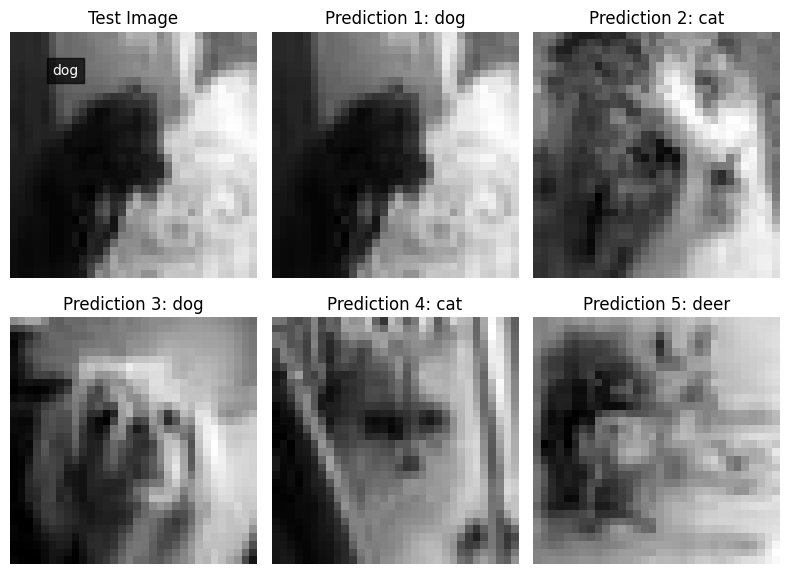

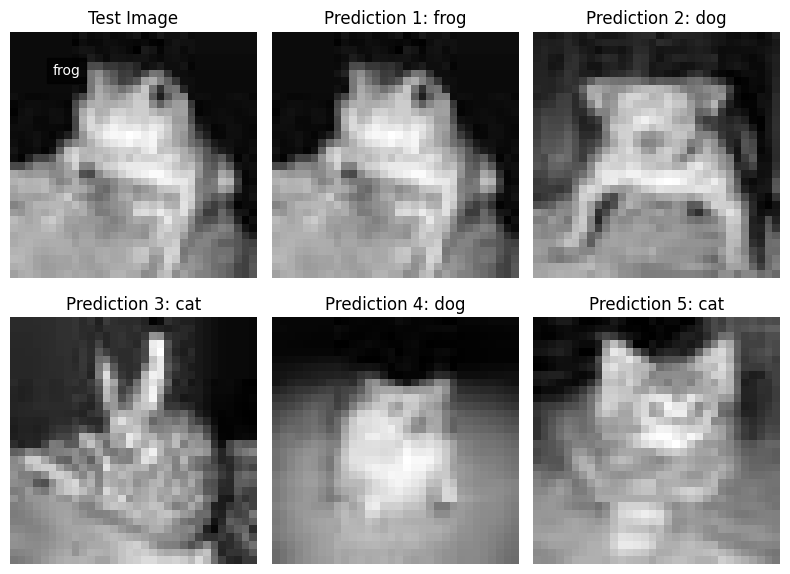

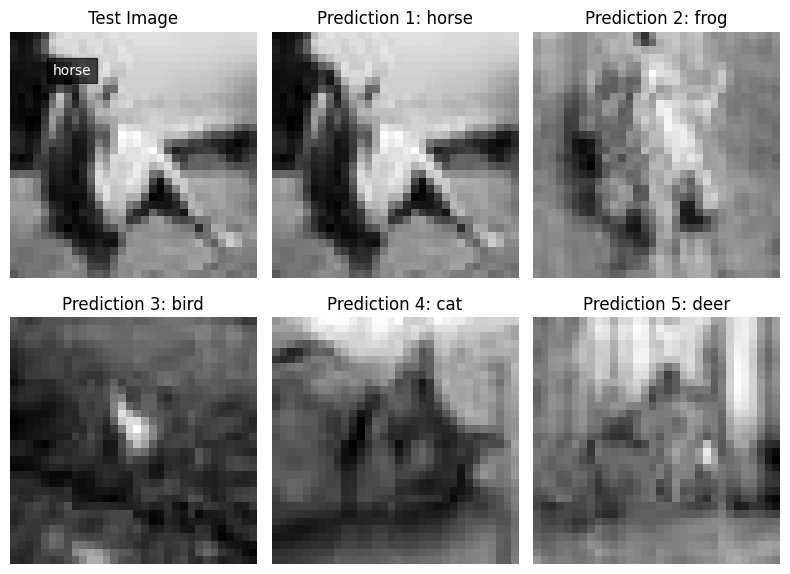

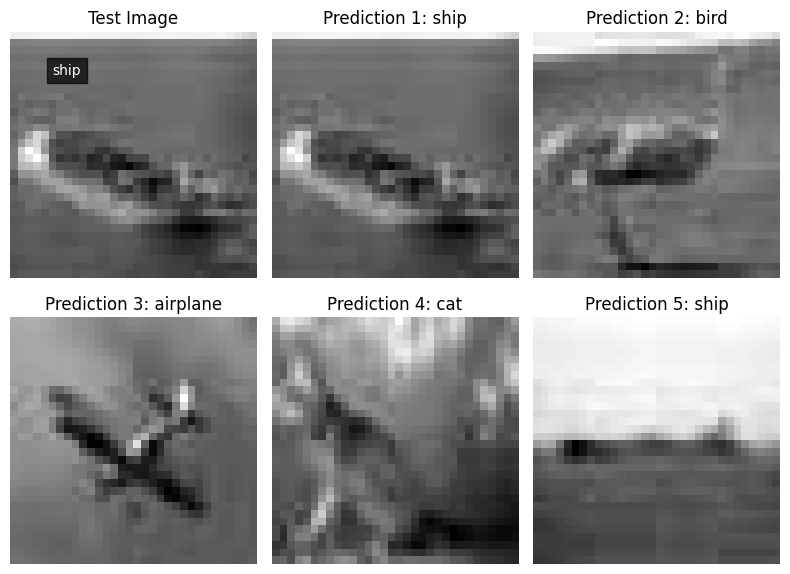

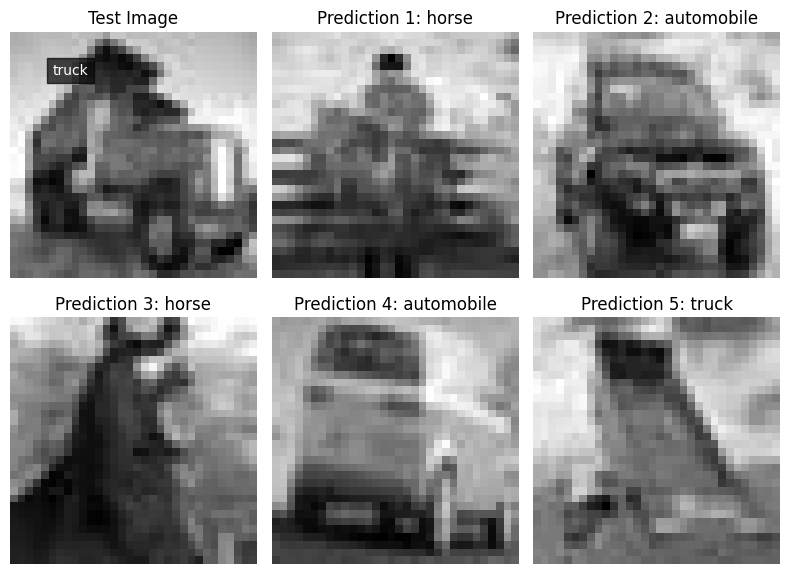

In [13]:
from sklearn.impute import SimpleImputer

TEST_DIR = 'D:\\CVPR\\CIFAR-10-images\\test'
test_images = []

for c in CATEGORIES:
    path = os.path.join(TEST_DIR, c)
    label = CATEGORIES.index(c)
    img_list = os.listdir(path)
    
    if len(img_list) > 0:
        # Select a random image from each category
        random_index = random.randint(0, len(img_list) - 1)
        img_path = os.path.join(path, img_list[random_index])
        img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (32, 32))
        test_images.append([img_arr, c])  # Label with category name

print(f"Total Test Images: {len(test_images)}")

test_data = np.array([image[0] for image in test_images]).reshape(len(test_images), -1)

predictions = classifier.predict(test_data)

for i, test_image in enumerate(test_images):
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(test_image[0], cmap='gray')
    plt.title(f'Test Image')  # Display category name as title
    plt.axis('off')
    
    plt.text(5, 5, test_image[1], color='white', fontsize=10,bbox=dict(facecolor='black', alpha=0.7))

    distances, indices = classifier.kneighbors(test_data[i].reshape(1, -1), n_neighbors=5)
    
    for j, index in enumerate(indices[0]):
        plt.subplot(2, 3, j + 2)
        plt.imshow(data[index].reshape(32, 32), cmap='gray')
        plt.title(f'Prediction {j + 1}: {CATEGORIES[labels[index]]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()